# Data Cleaning and PreProcessing
 dataset link: "https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis"

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## Importing Dataset using pandas

In [26]:
df_train = pd.read_csv("dataset/twitter_training.csv")
df_train.head()

,id,user,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [21]:
df_test = pd.read_csv("dataset/twitter_validation.csv")
df_test.head()

,id,user,sentiment,tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [4]:
df_train.shape

(74682, 4)

In [5]:
df_test.shape

(1000, 4)

## Processing Dataset 

In [16]:
df_train['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [17]:
label_map = {'Positive':1, 'Neutral':2, 'Negative':0, 'Irrelevant':3}

In [18]:
def data_processor(data):
    data.dropna(inplace=True)
    data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"@\w+", "", x))
    data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"[^A-Za-z\s]", "", x).strip().lower())
    data['sentiment'] = data['sentiment'].map(label_map)
    return data

In [7]:
df_train.isna().sum()

id             0
user           0
sentiment      0
tweet        686
dtype: int64

In [8]:
df_test.isna().sum()

id           0
user         0
sentiment    0
tweet        0
dtype: int64

In [27]:
df_train = data_processor(df_train)
df_train.head(2)

,id,user,sentiment,tweet
0,2401,Borderlands,1,im getting on borderlands and i will murder yo...
1,2401,Borderlands,1,i am coming to the borders and i will kill you...


In [22]:
df_test = data_processor(df_test)
df_test.head(2)

,id,user,sentiment,tweet
0,3364,Facebook,3,i mentioned on facebook that i was struggling ...
1,352,Amazon,2,bbc news amazon boss jeff bezos rejects claim...


In [28]:
df_train.head()

,id,user,sentiment,tweet
0,2401,Borderlands,1,im getting on borderlands and i will murder yo...
1,2401,Borderlands,1,i am coming to the borders and i will kill you...
2,2401,Borderlands,1,im getting on borderlands and i will kill you all
3,2401,Borderlands,1,im coming on borderlands and i will murder you...
4,2401,Borderlands,1,im getting on borderlands and i will murder y...


In [23]:
df_train.isna().sum()

id               0
user             0
sentiment    73996
tweet            0
dtype: int64

In [24]:
df_test.isna().sum()

id           0
user         0
sentiment    0
tweet        0
dtype: int64

## Creating plots for datas Visualisation

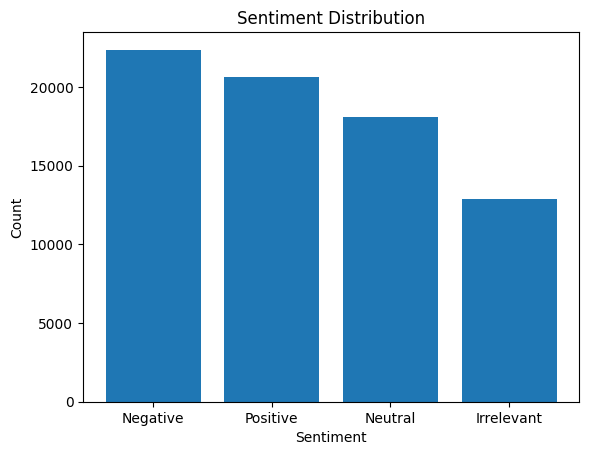

In [13]:
sentiment_counts = df_train['sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

## Saving the data Into csv file

In [29]:
df_train.to_csv("dataset/cleaned_data_train.csv")

In [30]:
df_test.to_csv("dataset/cleaned_data_test.csv")